In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import os,sys
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torchvision

In [3]:
import torchxrayvision as xrv
import skimage, torch, torchvision

# Prepare the image:
img = skimage.io.imread("./datasets/data/chestxray/NIH/images-224/00010582_000.png")
img = xrv.datasets.normalize(img, 255) # convert 8-bit image to [-1024, 1024] range
img = img.mean(2)[None, ...] # Make single color channel

transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

img = transform(img)
img = torch.from_numpy(img)

# show img 

# Load model and process image
model = xrv.models.DenseNet(weights="densenet121-res224-all")
outputs = model(img[None,...]) # or model.features(img[None,...]) 

# Print results
dict(zip(model.pathologies,outputs[0].detach().numpy()))

{'Atelectasis': 0.32797316,
 'Consolidation': 0.42933336,
 'Infiltration': 0.5316924,
 'Pneumothorax': 0.28849724,
 'Edema': 0.024142697,
 'Emphysema': 0.5011832,
 'Fibrosis': 0.51887786,
 'Effusion': 0.27805611,
 'Pneumonia': 0.18569896,
 'Pleural_Thickening': 0.24489835,
 'Cardiomegaly': 0.3645515,
 'Nodule': 0.68982,
 'Mass': 0.6392845,
 'Hernia': 0.00993878,
 'Lung Lesion': 0.011150705,
 'Fracture': 0.51916164,
 'Lung Opacity': 0.59073937,
 'Enlarged Cardiomediastinum': 0.27218717}


AxisError: axis 2 is out of bounds for array of dimension 2

In [9]:
def plot_sample_with_masks(sample, df):
    
    if "semantic_masks" in sample:
        width = len(sample["semantic_masks"])
        fig, axs = plt.subplots(1, max(2,1+width), sharey=True, figsize=(3+3*width,3))
        axs[0].imshow(sample["img"][0], cmap="Greys_r");
        axs[0].set_title("idx:" + str(sample["idx"]))
    
        for i, patho in enumerate(sample["semantic_masks"].keys()):
            axs[i+1].imshow(sample["img"][0], cmap="Greys_r");
            axs[i+1].imshow(sample["semantic_masks"][patho][0]+1, alpha=0.5);
            axs[i+1].set_title(patho)
        plt.show()
        
    if "pathology_masks" in sample:
        width = len(sample["pathology_masks"])
        fig, axs = plt.subplots(1, max(2,1+width), sharey=True, figsize=(3+3*width,3))
        axs[0].imshow(sample["img"][0], cmap="Greys_r");
        axs[0].set_title("idx:" + str(sample["idx"]))
        for i, patho in enumerate(sample["pathology_masks"].keys()):
            axs[i+1].imshow(sample["img"][0], cmap="Greys_r");
            axs[i+1].imshow(sample["pathology_masks"][patho][0]+1, alpha=0.5);
            axs[i+1].set_title(df.pathologies[patho])
        plt.show()
    pd.DataFrame(sample["lab"], index=df.pathologies)

In [10]:
dataset_path ='./datasets/data/chestxray'
d_nih = xrv.datasets.NIH_Dataset(imgpath=dataset_path + "/NIH/images-224",
                                views=["PA","AP"], unique_patients=False, pathology_masks=True)


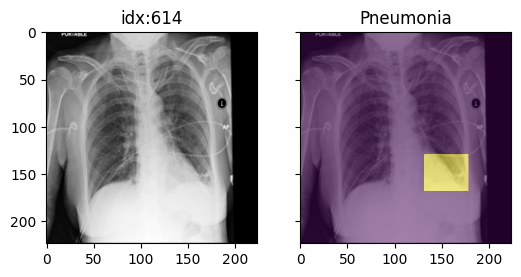

In [13]:
sample = d_nih[614]
plot_sample_with_masks(sample, d_nih)

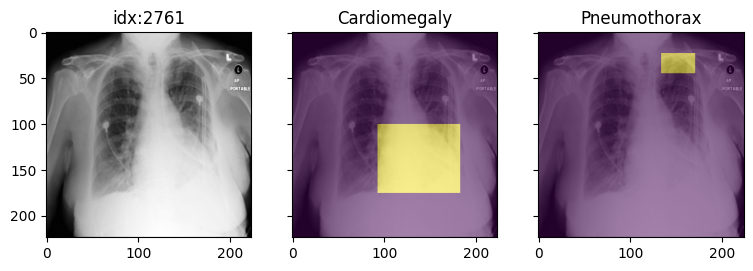

In [14]:
subset = d_nih.csv["Image Index"] == "00000732_005.png"
for idx in np.where(subset)[0][:10]:
    plot_sample_with_masks(d_nih[idx], d_nih)

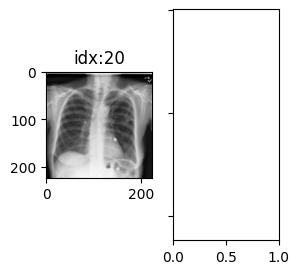

In [19]:
subset = d_nih.csv["Image Index"] == "00000005_007.png"
for idx in np.where(subset)[0][:10]:
    plot_sample_with_masks(d_nih[idx], d_nih)

In [15]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

data_transforms = torchvision.transforms.Compose([
        xrv.datasets.ToPILImage(),
        torchvision.transforms.RandomAffine(45, translate=(0.15, 0.15), scale=(0.85, 1.15)),
        torchvision.transforms.ToTensor()
    ])

In [16]:
d_nih_aug = xrv.datasets.NIH_Dataset(imgpath=dataset_path + "/NIH/images-224",
                                 views=["PA","AP"], unique_patients=False, pathology_masks=True,
                                 transform=transform,
                                 data_aug=data_transforms)

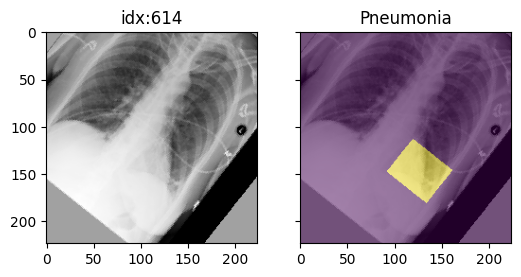

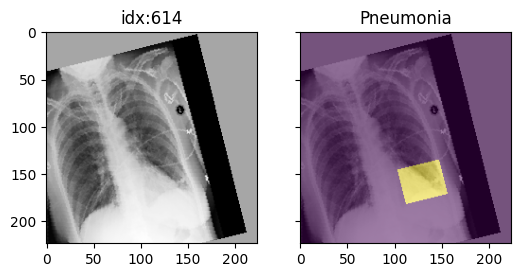

In [17]:
for i in range(2):
    sample = d_nih_aug[614]
    plot_sample_with_masks(sample, d_nih_aug)